# CMS-datan jaottelu ja histogrammien vertailu 

Tässä esimerkissä käytetään tiedostoa *Dimuon_DoubleMu.cvs* [1] jossa LHC:n kiihdyttämät protonit törmäävät CMS-ilmaisimen sisällä ja törmäyksestä syntyy myoni ja antimyoni. Tehtävänä on jaotella dataa ja vertailla ryhmiä histogrammin avulla.

<br>
Ruvetaas hommiin! Tuo ensimmäiseksi moduulit pandas ja matplotlib.pyplot, jotta voit lukea tiedostoja ja piirtää kuvaajia.

In [1]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

Voidaksesi käyttää lataamaasi datatiedostoa, sen tiedot täytyy tallentaa muuttujaan. Kirjoita tiedostosijainti ja -nimi siten, kuin se esiintyy tietokoneellasi. Tässä esimerkissä tiedosto (*Dimuon_DoubleMu.csv*) sijaitsee yhtä hakemistoa ylempänä (*../*) olevassa kansiossa nimeltään *Data* (*Data/*). Tiedoston tuomiseen tarvittava polku on siten
*../Data/Dimuon_DoubleMu.csv*.
<br>
<br>
Tallenna data muuttujaan *datasetti* ja tarkista ensimmäisten viiden rivin sisältö.

In [4]:
datasetti = pandas.read_csv('../../../Data/Dimuon_DoubleMu.csv')

datasetti.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159


Tässä harjoituksessa olemme kiinnostuneita hiukkasten invariantista massasta. Tallenna datasetin invarianttia massaa vastaava sarake muuttujaan *invariantti_massa* viittaamalla sarakkeen otsakkeeseen siten, kuin se esiintyy taulukossa (esim. *M*). Jos datasetistäsi puuttuu invariantin massan sarake, [laske arvot](https://github.com/cms-opendata-education/cms-jupyter-materials-finnish/blob/master/Harjoituksia/Laske-invariantti-massa.ipynb) ensin itse. Piirrä histogrammi kertomalla ohjelmalle piirrettävä muuttuja, pylväiden (bins) lukumäärä sekä haluttu piirtoväli (range). Alla olevassa esimerkissä piirretään invariantin massan histogrammi välillä 0-200 GeV ja 50 pylväällä.   

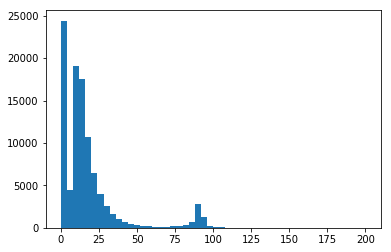

In [5]:
invariantti_massa = datasetti['M']

plt.hist(invariantti_massa, bins=50, range=(0,200))
plt.show()

Piirtoväliä ja pylväiden lukumäärää voidaan muuttaa tarkemman analyysin tekemiseksi. Alla piirretään sama kuvaaja uudestaan siten, että akselit on nimetty ja kuvaajalla on otsikko.

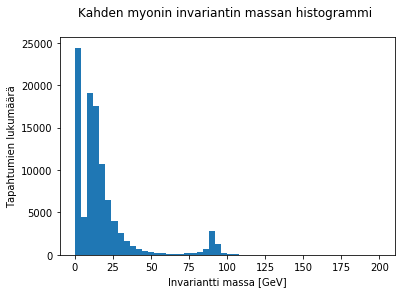

In [6]:
plt.xlabel('Invariantti massa [GeV]')
plt.ylabel('Tapahtumien lukumäärä')
plt.title('Kahden myonin invariantin massan histogrammi \n')

plt.hist(invariantti_massa, bins=50, range=(0,200))
plt.show()

Yllä olevasta kuvaajasta voidaan erottaa piikki noin 90 GeV:n kohdalla. Likimäärin 50 GeV:a   matalammat invariantin massan arvot havainnollistavat taustatapahtumia. 
<br>
<br>
Dataa voidaan käsitellä matemaattisilla operaattoreilla, kuten yhteen- ja vähennyslaskulla. Datan lajittelu onnistuu luomalla uusi muuttuja, johon talletetaan vain tietyn ehdon täyttävät arvot. Seuraavassa esimerkissä alkuperäisen datan tapahtumat jaetaan kahteen uuteen datasettiin hiukkasten energian perusteella. Datasetit nimetään ja lajitellaan korkeaan energiaan (> 150 GeV) ja matalaan energiaan (< 150 GeV).

In [20]:
uusiSettiKorkeaE = datasetti[datasetti.E1+datasetti.E2>150]
uusiSettiMatalaE = datasetti[datasetti.E1+datasetti.E2<150]

Uudet datasetit voidaan piirtää erikseen, kuten tehtiin aiemmin, tai sovittaa yhteen kuvaajaan. Kaksi histogrammia voidaan piirtää päällekkäin säätämällä niiden läpinäkyvyyttä komennolla *alpha*. Histogrammien selitteet tulostetaan kuvaajan oikeaan yläkulmaan selvyyden vuoksi. Lisäksi kuvaajan piirtoväli (range) voidaan rajata analyysin kannalta kiinnostavalle alueelle (piikki 90 GeV:n tuntumassa).  

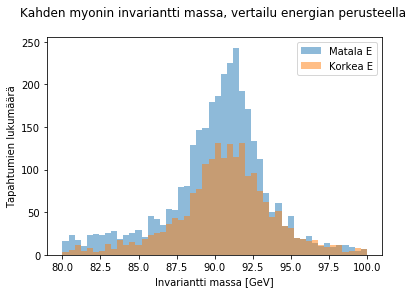

In [21]:
plt.xlabel('Invariantti massa [GeV]')
plt.ylabel('Tapahtumien lukumäärä')
plt.title('Kahden myonin invariantti massa, vertailu energian perusteella \n')
plt.hist(uusiSettiMatalaE ['M'], bins=50, range=(80,100), alpha=0.5, label='Matala E')
plt.hist(uusiSettiKorkeaE ['M'], bins=50, range=(80,100), alpha=0.5, label='Korkea E')
plt.legend (loc='upper right')
plt.show()

Mitä tapahtuu, jos muutat energiarajan arvoa? Kokeile energiarajan muuttamista luodessasi muuttujat *uusiSettiKorkeaE* ja *uusiSettiMatalaE*. Millä muulla ehdolla voisit lajitella datan?

### Lähteet
[1] Käytetty tiedosto, Datasets derived from the Run2011A DoubleMu
Url:http://opendata.cern.ch/record/545